In [1]:
import json
import os
import matplotlib.pyplot as plt
import re
import numpy as np

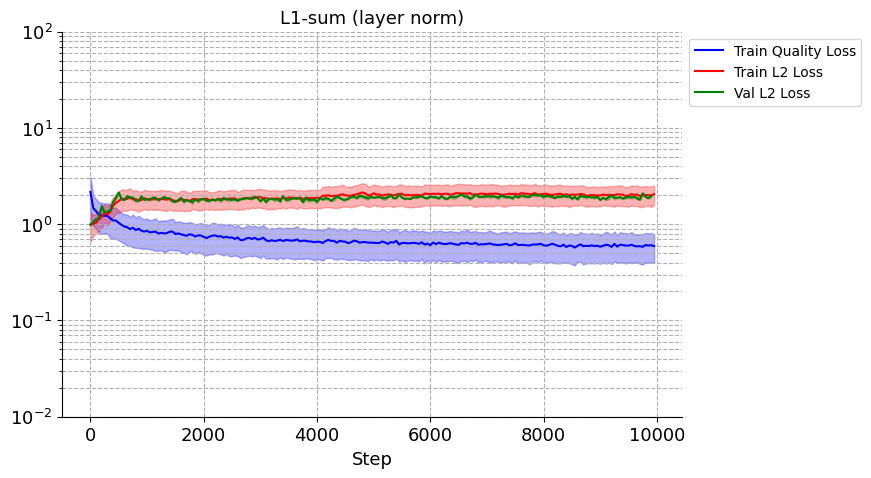

In [2]:
def get_plot(experiment_id, fontsize=13):
    #experiment_id =19
    # Experiment to run
    folder = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}"
    experiments_path = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"

    quality_losses = []
    regularisation_losses = []
    regularisation_losses_val = []

    with open(experiments_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            #print(line)
            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            if experiment_id >= 173:
                match = re.search(r"\[DEBUG\] Quality_loss: ([\d\.]+), L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)
                if match:
                    # Extract the step, current loss, and current train items if present
                    quality_loss, mse_loss, regularisation_weight, _, _, _, _ = match.groups()
                    # Add to lists
                    quality_losses.append(float(quality_loss))
                    regularisation_losses.append(float(mse_loss))
            
            else:
                match = re.search(r"\[DEBUG\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+), Quality loss: ([\d\.]+)", line)
                if match:
                    _, regularisation_weight, mse_loss, quality_loss = match.groups()
                    quality_losses.append(float(quality_loss))
                    regularisation_losses.append(float(mse_loss))

            

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                mse_loss, regularisation_weight, _, _, _, _ = match.groups()
                # Add to validation list
                regularisation_losses_val.append(float(mse_loss))

    # Remove first element
    quality_losses = quality_losses[1:]
    regularisation_losses = regularisation_losses[1:]
    regularisation_losses_val = regularisation_losses_val[2:-1]

    # print(len(quality_losses))
    # print(len(regularisation_losses))
    # print(len(regularisation_losses_val))

    num_elements = 50
    num_elements_val = 2
    #quality_losses = quality_losses[:limit_steps]
    #regularisation_losses = regularisation_losses[:limit_steps]
    # Example data for demonstration purposes
    # Calculate the mean for every 10 elements
    means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
    std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

    means_regularisation = np.array([np.mean(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
    std_regularisation = np.array([np.std(regularisation_losses [i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])

    means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])
    std_regularisation_val = np.array([np.std(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

    #### 
    # Try with median and quartiles
    ####

    #print(len(means_regularisation_val))
    #print(len(std_regularisation_val))

    steps = list(range(0, len(quality_losses), num_elements))

    # Creating the plot with a logarithmic scale on the y-axis
    #plt figure
    plt.plot(steps, means_quality, linestyle='-', color='blue', label='Train Quality Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3)

    plt.plot(steps, means_regularisation, linestyle='-', color='red', label='Train L2 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3)

    plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L2 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3)

    plt.yscale('log')  # Setting the y-axis to a logarithmic scale
    plt.ylim(1e-2, 1e2)  # Setting the limits for the y-axis
    plt.xlabel('Step',fontsize=fontsize)
    #plt.ylabel('Loss')
    #plt.title('Losses over steps')
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)

    plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
    #plt.legend()
    #plt.savefig(f"{folder}/losses_std.png", dpi=300)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

fontsize = 13
plt.figure(figsize=(8, 5))
# plt.subplot(121)
# get_plot(19)
# plt.title('L1-sum (no layer norm)',fontsize=fontsize)
# plt.ylabel('Loss',fontsize=fontsize)
# plt.subplot(122)
# get_plot(187)
# plt.title('L1-sum (layer norm)',fontsize=fontsize)
# plt.subplots_adjust(wspace=0.3)
# #plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
get_plot(187)
plt.title('L1-sum (layer norm)',fontsize=fontsize)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

9999
9999
398
512
10000
401
512
0.0029470809154190647
199
199
9999
9999
398
512
10000
401
512
0.005100378915813053
199
199


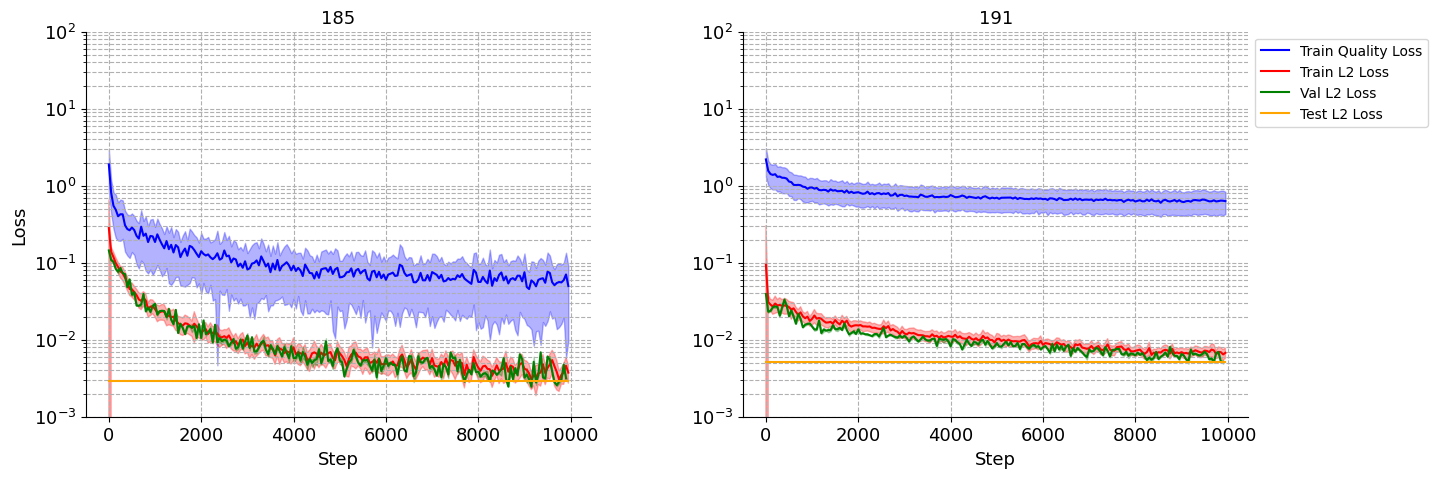

In [12]:

def get_test_plot(experiment_id,fontsize=13):
    # Experiment to run
    folder = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}"
    experiments_path = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"
    experiments_test_path = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}/experiment_log_test.out"

    quality_losses = []
    regularisation_losses = []
    L3_losses = []
    regularisation_losses_val = []
    L3_losses_val = []
    regularisation_losses_test = []
    L3_losses_test = []

    with open(experiments_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            
            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+), Quality loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG\] Quality_loss: ([\d\.]+), L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)
            if match:
                # Extract the step, current loss, and current train items if present
                #regularised_loss, regularisation_weight, mse_loss, quality_loss = match.groups()
                quality_loss, mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to lists
                quality_losses.append(float(quality_loss))
                regularisation_losses.append(float(mse_loss))
                L3_losses.append(float(L3_loss))

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to validation list
                regularisation_losses_val.append(float(mse_loss))
                L3_losses_val.append(float(L3_loss))

    with open(experiments_test_path, 'r') as file:
        lines = file.readlines()

        for line in lines:

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                #regularised_loss, regularisation_weight, mse_loss = match.groups()
                mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to validation list
                regularisation_losses_test.append(float(mse_loss))
                L3_losses_test.append(float(L3_loss))

    # Remove first element
    quality_losses = quality_losses[1:]
    regularisation_losses = regularisation_losses[1:]
    regularisation_losses_val = regularisation_losses_val[2:-1]

    print(len(quality_losses))
    print(len(regularisation_losses))
    print(len(regularisation_losses_val))
    print(len(regularisation_losses_test))

    print(len(L3_losses))
    print(len(L3_losses_val))
    print(len(L3_losses_test))

    num_elements = 50
    num_elements_val = 2
    #quality_losses = quality_losses[:limit_steps]
    #regularisation_losses = regularisation_losses[:limit_steps]
    # Example data for demonstration purposes
    # Calculate the mean for every 10 elements
    means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
    std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

    means_regularisation = np.array([np.mean(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
    std_regularisation = np.array([np.std(regularisation_losses [i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])

    means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])
    std_regularisation_val = np.array([np.std(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

    means_test = np.mean(np.array(regularisation_losses_test))
    print(means_test)
    #### 
    # Try with median and quartiles
    ####

    print(len(means_regularisation_val))
    print(len(std_regularisation_val))

    steps = list(range(0, len(quality_losses), num_elements))

    # Creating the plot with a logarithmic scale on the y-axis
    #plt.figure(figsize=(8, 5))
    plt.plot(steps, means_quality, linestyle='-', color='blue', label='Train Quality Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3)

    plt.plot(steps, means_regularisation, linestyle='-', color='red', label='Train L2 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3)

    plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L2 Loss')
    plt.plot(steps, np.repeat(means_test, len(steps)), linestyle='-', color='orange', label='Test L2 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.yscale('log')  # Setting the y-axis to a logarithmic scale
    plt.ylim(1e-3, 1e2)  # Setting the limits for the y-axis
    plt.xlabel('Step',fontsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)
    plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability

#experiment_id = 184
plt.figure(figsize=(15, 5))
# get_test_plot(191)
# plt.ylabel('Loss')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fontsize=13
plt.subplot(121)
get_test_plot(185)
plt.title('185',fontsize=fontsize)
plt.ylabel('Loss',fontsize=fontsize)
plt.subplot(122)
get_test_plot(191)
plt.title('191',fontsize=fontsize)
plt.subplots_adjust(wspace=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))




9999
9999
398
512
9999
398
512
0.010443294608194265
199
199
9999
9999
398
512
9999
398
512
43.926655039191246
199
199


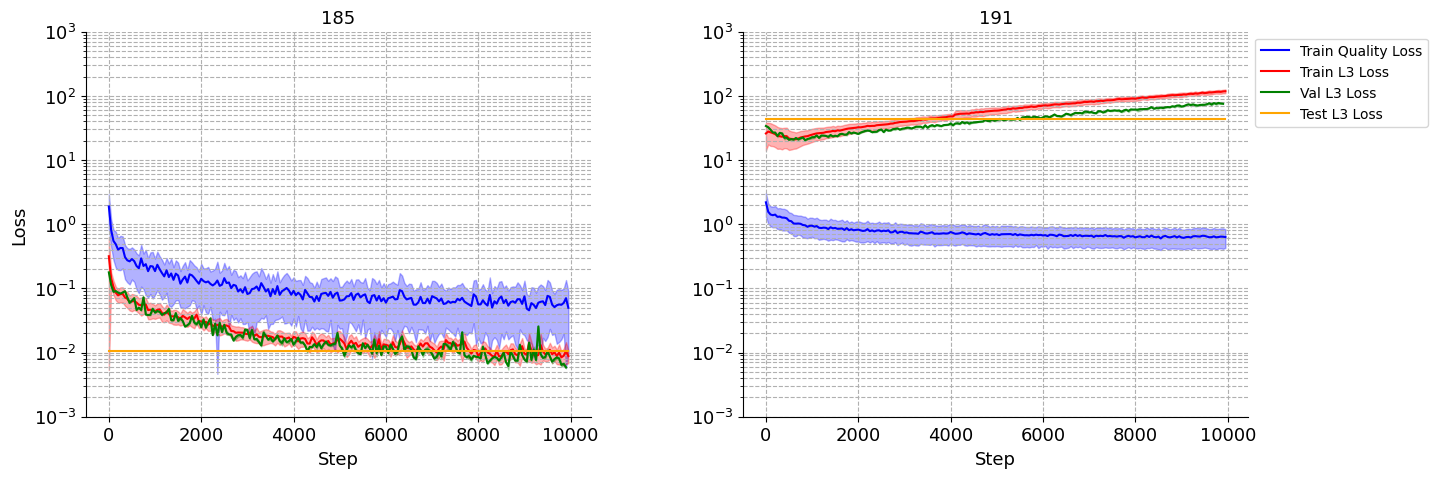

In [16]:
def get_test_plot_L3(experiment_id,fontsize=13):
    # Experiment to run
    folder = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}"
    experiments_path = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"
    experiments_test_path = f"/rds/user/ar2217/hpc-work/L65/clrs-ls65/results/{experiment_id}/experiment_log_test.out"

    quality_losses = []
    regularisation_losses = []
    L3_losses = []
    regularisation_losses_val = []
    L3_losses_val = []
    regularisation_losses_test = []
    L3_losses_test = []

    with open(experiments_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            
            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+), Quality loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG\] Quality_loss: ([\d\.]+), L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)
            if match:
                # Extract the step, current loss, and current train items if present
                #regularised_loss, regularisation_weight, mse_loss, quality_loss = match.groups()
                quality_loss, mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to lists
                quality_losses.append(float(quality_loss))
                regularisation_losses.append(float(mse_loss))
                L3_losses.append(float(L3_loss))

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to validation list
                regularisation_losses_val.append(float(mse_loss))
                L3_losses_val.append(float(L3_loss))

    with open(experiments_test_path, 'r') as file:
        lines = file.readlines()

        for line in lines:

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            #match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)
            match = re.search(r"\[DEBUG-VAL\] L2_loss: ([\d\.]+), L2_regularisation_weight: ([\d\.]+), L3_loss: ([\d\.]+), L3_regularisation_weight: ([\d\.]+), L3_cocycle_loss: ([\d\.]+), L3_multimorphism_loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                #regularised_loss, regularisation_weight, mse_loss = match.groups()
                mse_loss, regularisation_weight, L3_loss, _, _, _ = match.groups()
                # Add to validation list
                regularisation_losses_test.append(float(mse_loss))
                L3_losses_test.append(float(L3_loss))

    # Remove first element
    quality_losses = quality_losses[1:]
    regularisation_losses = regularisation_losses[1:]
    regularisation_losses_val = regularisation_losses_val[2:-1]
    L3_losses = L3_losses[1:]
    L3_losses_val = L3_losses_val[2:-1]

    print(len(quality_losses))
    print(len(regularisation_losses))
    print(len(regularisation_losses_val))
    print(len(regularisation_losses_test))

    print(len(L3_losses))
    print(len(L3_losses_val))
    print(len(L3_losses_test))

    num_elements = 50
    num_elements_val = 2
    #quality_losses = quality_losses[:limit_steps]
    #regularisation_losses = regularisation_losses[:limit_steps]
    # Example data for demonstration purposes
    # Calculate the mean for every 10 elements
    means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
    std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

    means_regularisation = np.array([np.mean(L3_losses[i:i+num_elements]) for i in range(0, len(L3_losses ), num_elements)])
    std_regularisation = np.array([np.std(L3_losses [i:i+num_elements]) for i in range(0, len(L3_losses ), num_elements)])

    means_regularisation_val = np.array([np.mean(L3_losses_val[i:i+num_elements_val]) for i in range(0, len(L3_losses_val), num_elements_val)])
    std_regularisation_val = np.array([np.std(L3_losses_val[i:i+num_elements_val]) for i in range(0, len(L3_losses_val), num_elements_val)])

    means_test = np.mean(np.array(L3_losses_test))
    print(means_test)
    #### 
    # Try with median and quartiles
    ####

    print(len(means_regularisation_val))
    print(len(std_regularisation_val))

    steps = list(range(0, len(quality_losses), num_elements))

    # Creating the plot with a logarithmic scale on the y-axis
    #plt.figure(figsize=(8, 5))
    plt.plot(steps, means_quality, linestyle='-', color='blue', label='Train Quality Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3)

    plt.plot(steps, means_regularisation, linestyle='-', color='red', label='Train L3 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3)

    plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='Val L3 Loss')
    plt.plot(steps, np.repeat(means_test, len(steps)), linestyle='-', color='orange', label='Test L3 Loss')
    # Plot standard deviations as transparent ranges
    plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.yscale('log')  # Setting the y-axis to a logarithmic scale
    plt.ylim(1e-3, 1e3)  # Setting the limits for the y-axis
    plt.xlabel('Step',fontsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)
    plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability

#experiment_id = 184
plt.figure(figsize=(15, 5))
# get_test_plot(191)
# plt.ylabel('Loss')

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fontsize=13
plt.subplot(121)
get_test_plot_L3(185)
plt.title('185',fontsize=fontsize)
plt.ylabel('Loss',fontsize=fontsize)
plt.subplot(122)
get_test_plot_L3(191)
plt.title('191',fontsize=fontsize)
plt.subplots_adjust(wspace=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
